# Series de Tiempo

## 0. Fechas

En programación es fundamental trabajar con fechas y horas. Pero basta un poco de reflexión al respecto para ver que no es, en principio, tan inmediato como sumar y restar números. Sumar horas puede hacer que cambiemos de día, mes y hasta año. Catorce días luego del 15 de Febrero puede dar como resultado el 01 de Marzo o el 29 de Febrero si se trata de un año bisiesto.

El famoso [Error del Milenio](https://en.wikipedia.org/wiki/Year_2000_problem) era un problema de fechas. Si bien no significó el fin del mundo, sí trajo algunos problemas (por suerte menores) y dolores de cabeza. Esto fue gracias a todas las personas que trabajaron para evitar mayores inconvenientes. Sin embargo, no se trata de un problema resuelto. Tenemos, hacia adelante, el [problema del año 2038](https://en.wikipedia.org/wiki/Year_2038_problem), pero sus inconvenientes ya [están aquí](https://nitter.net/jxxf/status/1219009308438024200). Un problema similar ocurrió en [algunos dispositivos GPS durante 2019](https://www.theverge.com/2019/3/8/18255847/gps-week-rollover-issue-2019-garmin-tomtom-devices-affected).

Otros problemas más mundanos involucran el formato en el que solemos encontrar fechas. Por ejemplo, en muchos países es común escribir Día - Mes - Año (DD - MM - YYYY), mientras que en EEUU es común Mes - Día - Año (MM - DD - YYYY). Desde un punto de vista computacional, es más cómodo Año - Mes - Día (YYYY - MM - DD), ya que eso permite ordenar fácilmente de menor a mayor. Eso sin considerar husos horarios, cambios en horario de verano e invierno, y un innumerable conjunto de problemas más.

En Series de Tiempo - como te imaginarás - también es fundamental trabajar con fechas y horas. Solemos tener que prestar atención a cómo figura la fecha en nuestros datos y cómo adaptarla a un formato único para todas las fuentes de datos que vayamos a usar. Luego, tenemos que poder operar con esas fechas y horas.

Por suerte, todos los lenguajes de programación cuentan con módulos para trabajar con fechas y horas. En Python, el módulo estándar es `datetime`. No entraremos en grandes detalles sobre cómo es su uso, solamente haremos algunas demostraciones en las siguientes celdas. Pero sí te recomendamos googlear cómo operar con este módulo cuando estés trabajando con fechas, ya que muchos problemas con los que uno se encuentra ya están resueltos. Te dejamos una muy buena introducción al módulo [aquí](https://realpython.com/python-datetime/).

El módulo `datetime` cuenta con una clase principal, `datetime` (se llama igual que el módulo)

In [127]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
import seaborn as sns
sns.set_context('notebook')
sns.set_style('ticks')

una_fecha = datetime.datetime(year=2020, month=7, day=27)
una_fecha

datetime.datetime(2020, 7, 27, 0, 0)

Pero si imprimimos

In [128]:
print(una_fecha)

2020-07-27 00:00:00


Notar que también tiene lugar para el horario

In [129]:
una_fecha = datetime.datetime(year=2020, month=7, day=27, hour = 7, minute = 30)
print(una_fecha)

2020-07-27 07:30:00


Dentro de sus atributos, podemos resaltar `date` y `time`, que **también son clases dentro del módulo**.

In [130]:
print(una_fecha.date())
una_fecha.date()

2020-07-27


datetime.date(2020, 7, 27)

In [131]:
print(una_fecha.time())
una_fecha.time()

07:30:00


datetime.time(7, 30)

`datetime` ya sabe operar con fechas. Por ejemplo, podemos sumar días y horas a `una_fecha`

In [132]:
print(una_fecha + datetime.timedelta(days = 40, hours = 10))

2020-09-05 17:30:00


Una funcionalidad sumamente útil es crear objetos `datetime` a partir de texto (strings) con el método `strptime()`

In [133]:
fecha_en_string = '2019-08-27'
print(datetime.datetime.strptime(fecha_en_string, '%Y-%m-%d'))

2019-08-27 00:00:00


In [134]:
fecha_en_string = '2019-08-27 15:30:10' # este es un formato sumamente estándar
print(datetime.datetime.strptime(fecha_en_string, '%Y-%m-%d %H:%M:%S'))

2019-08-27 15:30:10


Para cualquier formato de fechas que encuentes, siempre encontrarás una forma de que el módulo lo reconozca.

También existe su contraparte, `strftime()`, para llevar de `datetime` a texto

In [135]:
print(una_fecha.strftime('%Y-%m-%d %H:%M:%S'))
print(una_fecha.strftime('%H:%M:%S %d-%m-%Y'))

2020-07-27 07:30:00
07:30:00 27-07-2020


Las funcionalidades son muchas y no vale la pena que las expliquemos todas acá. Pero, insistimos en una cosa: cualquier problema con el que te encuentres, en el 99.99% de los casos alguien ya lo tuvo y lo resolvió. Lo más probable es que hasta se trate de un método ya incorporado. Así que vale la pena investigar a medida que necesites operar con fechas y horarios.

**Para investigar:** ¿qué es el *Epoch Time*?

* El tiempo Epoch es una magnitud que proporciona a la fecha del ordenador un valor numérico expresado en segundos, así como un punto de partida desde el que empezar a contar. De esta manera, los PCs pueden interpretar las fechas como magnitudes legibles y calculables.
* En informática, el tiempo Epoch se refiere al punto de partida utilizado para calcular el número de segundos transcurridos desde ese punto de partida y hasta el momento actual, de manera que se pueda calcular la fecha y hora exactas.

# Módulo datetime

El módulo datetime de la biblioteca estándar de Python proporciona los tipos de variables básicos y herramientas para datos de fecha y hora. Para comenzar, recuperamos la fecha y hora actuales.

In [136]:
from datetime import datetime
now=datetime.now()
now

datetime.datetime(2025, 3, 21, 12, 56, 43, 811629)

In [137]:
print(now)

2025-03-21 12:56:43.811629


La variable `now` que creamos tiene un tipo de dato especial que almacena la fecha y la hora con precisión de microsegundos.

In [138]:
type(now)

datetime.datetime

In [139]:
now.year, now.month, now.day

(2025, 3, 21)

In [140]:
delta=datetime(2020, 9, 15)-datetime(2019, 9, 12, 6, 10)
delta

datetime.timedelta(days=368, seconds=64200)

In [141]:
delta.days, delta.seconds

(368, 64200)

Por ejemplo, si queremos adelantar una fecha 5 días, podemos usar:

In [142]:
from datetime import timedelta
start=datetime(2020, 10, 1)
start+timedelta(5)

datetime.datetime(2020, 10, 6, 0, 0)

Como nota, el módulo `datetime` también tiene objetos separados para fecha y hora.  

Otro problema que podrías tener que manejar son las zonas horarias, especialmente cuando comparas datos de diferentes fuentes geolocalizadas. En esos casos, debes decidir si el tiempo local es relevante para tu problema o si necesitas usar el tiempo universal, especialmente si trabajas con eventos locales o globales.  

En ese caso, Python puede manejarlo. Por defecto, Python usa la hora local a menos que se exprese explícitamente lo contrario.

In [143]:
print("Local time:", datetime.now())
print("UTC time:", datetime.utcnow())

Local time: 2025-03-21 12:56:43.860287
UTC time: 2025-03-21 12:56:43.860525


También debes tener esto en cuenta al leer datos que no especifican su zona horaria.  

## Conversiones entre `strings` y `datetime`  

Los objetos `datetime` (y sus equivalentes en pandas) tienen el método `strftime`, que nos permite convertirlos en una cadena según el formato que deseemos. Consulta esta página para ver las opciones de formato disponibles.

In [144]:
stamp=datetime(2020,10,1)
stamp.strftime('%Y-%m-%d')

'2020-10-01'

In [145]:
stamp.strftime('%d/%b/%y')

'01/Oct/20'

El formato predeterminado es casi el formato ISO.

In [146]:
print(now)

2025-03-21 12:56:43.811629


In [147]:
now.isoformat()

'2025-03-21T12:56:43.811629'

In [148]:
now.strftime('%c')

'Fri Mar 21 12:56:43 2025'

In [149]:
now.timestamp() # seconds since the Epoch (1/1/1970)

1742561803.811629

Para convertir cadenas en objetos `datetime`, podemos usar la función `parse`, que infiere casi cualquier formato de fecha inteligible. Aquí tienes un ejemplo.

In [150]:
from dateutil.parser import parse
parse('Sept 15th 2020')

datetime.datetime(2020, 9, 15, 0, 0)

Solo debemos tener cuidado con el hecho de que asume un formato de fecha de EE. UU., a menos que especifiquemos lo contrario.

In [151]:
print(parse('1/10/2020'))
print(parse('1/10/2020', dayfirst=True))

2020-01-10 00:00:00
2020-10-01 00:00:00


# Date functionality in pandas

Cuando trabajamos con múltiples fechas, recurrimos a pandas.

In [152]:
dts=['10/10/2020','11/10/2020']
dates=pd.to_datetime(dts, dayfirst=True)
dates

DatetimeIndex(['2020-10-10', '2020-10-11'], dtype='datetime64[ns]', freq=None)

Pandas tiene mucha "inteligencia", lo que implica muchos efectos secundarios. Por ejemplo, asume que el primer número es un mes, a menos que haya un valor mayor que 12.

In [153]:
dts=['10/10/2020','11/10/2020']
dates=pd.to_datetime(dts)
dates

DatetimeIndex(['2020-10-10', '2020-11-10'], dtype='datetime64[ns]', freq=None)

In [154]:
dts=['10/10/2020','20/10/2020']
dates = pd.to_datetime(dts, format='%d/%m/%Y')
dates


DatetimeIndex(['2020-10-10', '2020-10-20'], dtype='datetime64[ns]', freq=None)

**Cuidado:** la mayoría de las veces, los efectos secundarios son lo que esperamos, pero a veces explican "cosas locas" que ocurren.  

En pandas, un conjunto de fechas tiene el tipo `DatetimeIndex`. Cada elemento de un `DatetimeIndex` tiene el tipo `Timestamp`, que, para fines prácticos, es equivalente a `datetime`; podemos usar ambos de manera intercambiable.

In [155]:
dates[0]

Timestamp('2020-10-10 00:00:00')

La función `date_range` de pandas nos permite generar un rango de fechas según una frecuencia especificada.

In [156]:
dates=pd.date_range('1/Oct/2020', '5/Oct/2020')
print(dates)

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05'],
              dtype='datetime64[ns]', freq='D')


Para establecer la frecuencia, podemos configurar la opción de fecha. Por ejemplo, para una frecuencia diaria de negocios:

In [157]:
dates=pd.date_range(start='1/Oct/2020', periods=5, freq='B')
print(dates)

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-05', '2020-10-06',
               '2020-10-07'],
              dtype='datetime64[ns]', freq='B')


Frecuencia mensual:

In [158]:
dates=pd.date_range(start='1/Oct/2020', periods=5, freq='M')
print(dates)

DatetimeIndex(['2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28'],
              dtype='datetime64[ns]', freq='ME')


<ipython-input-158-f6664bf47a19>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates=pd.date_range(start='1/Oct/2020', periods=5, freq='M')


La opción de frecuencia también acepta múltiplos:

In [159]:
dates=pd.date_range(start='1/Oct/2020', periods=5, freq='3M')
print(dates)

DatetimeIndex(['2020-10-31', '2021-01-31', '2021-04-30', '2021-07-31',
               '2021-10-31'],
              dtype='datetime64[ns]', freq='3ME')


<ipython-input-159-fbabf4322fbe>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates=pd.date_range(start='1/Oct/2020', periods=5, freq='3M')


## Periods

Un objeto relacionado es el `Period`, que representa un lapso de tiempo como meses y trimestres, en lugar de un punto en el tiempo como en `Timestamp`. Por ejemplo, la variable a continuación representa el período entre el 1/10/2016 y el 31/10/2016.

In [160]:
month=pd.Period('Dec-2020', freq='M')
month

Period('2020-12', 'M')

Al igual que con los objetos `datetime` y `Timestamp`, podemos realizar operaciones con un objeto `Period`.

In [161]:
month+1

Period('2021-01', 'M')

El equivalente de `DatetimeIndex` es el `PeriodIndex`.

In [162]:
values=['2020Q1', '2020Q2', '2020Q3', '2020Q4']
index=pd.PeriodIndex(values, freq='Q')
index

PeriodIndex(['2020Q1', '2020Q2', '2020Q3', '2020Q4'], dtype='period[Q-DEC]')

Para generar un rango de períodos:

In [163]:
pd.period_range('2020Q1','2021Q4', freq='Q')

PeriodIndex(['2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2',
             '2021Q3', '2021Q4'],
            dtype='period[Q-DEC]')

Finalmente, podemos convertir los `timestamps` a `periods` de la siguiente manera.

In [164]:
dates=pd.date_range(start='1/Oct/2020', periods=5, freq='M')
print(dates)
dates.to_period()

DatetimeIndex(['2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28'],
              dtype='datetime64[ns]', freq='ME')


<ipython-input-164-b016ed1f88cd>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates=pd.date_range(start='1/Oct/2020', periods=5, freq='M')


PeriodIndex(['2020-10', '2020-11', '2020-12', '2021-01', '2021-02'], dtype='period[M]')

## Lectura de datos con marca de tiempo

Ahora trabajemos con datos. Para simplificar, nuestros datos tendrán solo una columna además de la fecha. Los mismos principios se aplican al trabajar con data frames en lugar de una sola serie.

El archivo `nswretail.csv` contiene cifras mensuales de facturación minorista para el estado de NSW. Descargué los datos desde el sitio web del [Australian Bureau of Statistics](http://www.abs.gov.au/ausstats/abs@.nsf/mf/8501.0). Las [notas explicativas](http://www.abs.gov.au/Ausstats/abs@.nsf/exnote/8501.0) de la ABS definen la facturación minorista como:

> Ventas minoristas; ventas al por mayor; ingresos por reparaciones, comidas y alquiler de bienes (excepto por alquiler, arrendamiento y alquiler de terrenos y edificios);  
> comisiones por actividad de agencia (por ejemplo, comisiones recibidas por recoger tintorería, vender boletos de lotería, etc.); y  
> el impuesto sobre bienes y servicios.

Para leer los datos, seguimos el procedimiento habitual. Si abres el archivo de datos en un editor de texto, verás que tiene dos columnas: `Month` y `Turnover`. En un contexto de series temporales, queremos establecer la fecha como el índice del `DataFrame` especificando `Month` como índice mediante la opción `index_col`. Configuramos la opción `parse_dates` en `True` para que pandas pueda reconocer automáticamente la columna de fechas y convertirlas en objetos `TimeStamp`.

In [165]:
ts=pd.read_csv('nswretail.csv', index_col='Month', parse_dates=True)
ts.tail()

<ipython-input-165-7208396ecd1f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts=pd.read_csv('nswretail.csv', index_col='Month', parse_dates=True)


,Turnover
Month,
2018-05-01,8438.3
2018-06-01,8354.4
2018-07-01,8304.6
2018-08-01,8474.8
2018-09-01,8387.7


In [166]:
ts.index

DatetimeIndex(['1982-04-01', '1982-05-01', '1982-06-01', '1982-07-01',
               '1982-08-01', '1982-09-01', '1982-10-01', '1982-11-01',
               '1982-12-01', '1983-01-01',
               ...
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01'],
              dtype='datetime64[ns]', name='Month', length=438, freq=None)

Podemos ver que pandas convirtió (por ejemplo) "Jun-2017" en el archivo de texto a una fecha completa, que por defecto es el primer día del mes. Dado que sabemos que estas cifras se refieren a todo el mes, queremos convertir los índices de timestamps a períodos.

In [167]:
ts.index=ts.index.to_period()
ts.tail()

,Turnover
Month,
2018-05,8438.3
2018-06,8354.4
2018-07,8304.6
2018-08,8474.8
2018-09,8387.7


## Subconjunto de una serie temporal  

Seleccionar parte de la serie temporal funciona de manera intuitiva.

In [168]:
ts['Feb-2017':'Jun-2017']

,Turnover
Month,
2017-02,7298.9
2017-03,8085.8
2017-04,7883.7
2017-05,8132.0
2017-06,8130.1


In [169]:
ts['2017Q1':'2017Q4']

,Turnover
Month,
2017-01,8199.0
2017-02,7298.9
2017-03,8085.8
2017-04,7883.7
2017-05,8132.0
2017-06,8130.1
2017-07,8061.9
2017-08,8090.2
2017-09,8205.9


In [170]:
ts['Feb2017':]

,Turnover
Month,
2017-02,7298.9
2017-03,8085.8
2017-04,7883.7
2017-05,8132.0
2017-06,8130.1
2017-07,8061.9
2017-08,8090.2
2017-09,8205.9
2017-10,8556.0


## Gráfico de series temporales  

Una vez que cargamos la serie temporal, el inicio de nuestro análisis siempre será visualizar los datos. La forma más sencilla de graficar una serie temporal es usar pandas de la siguiente manera.

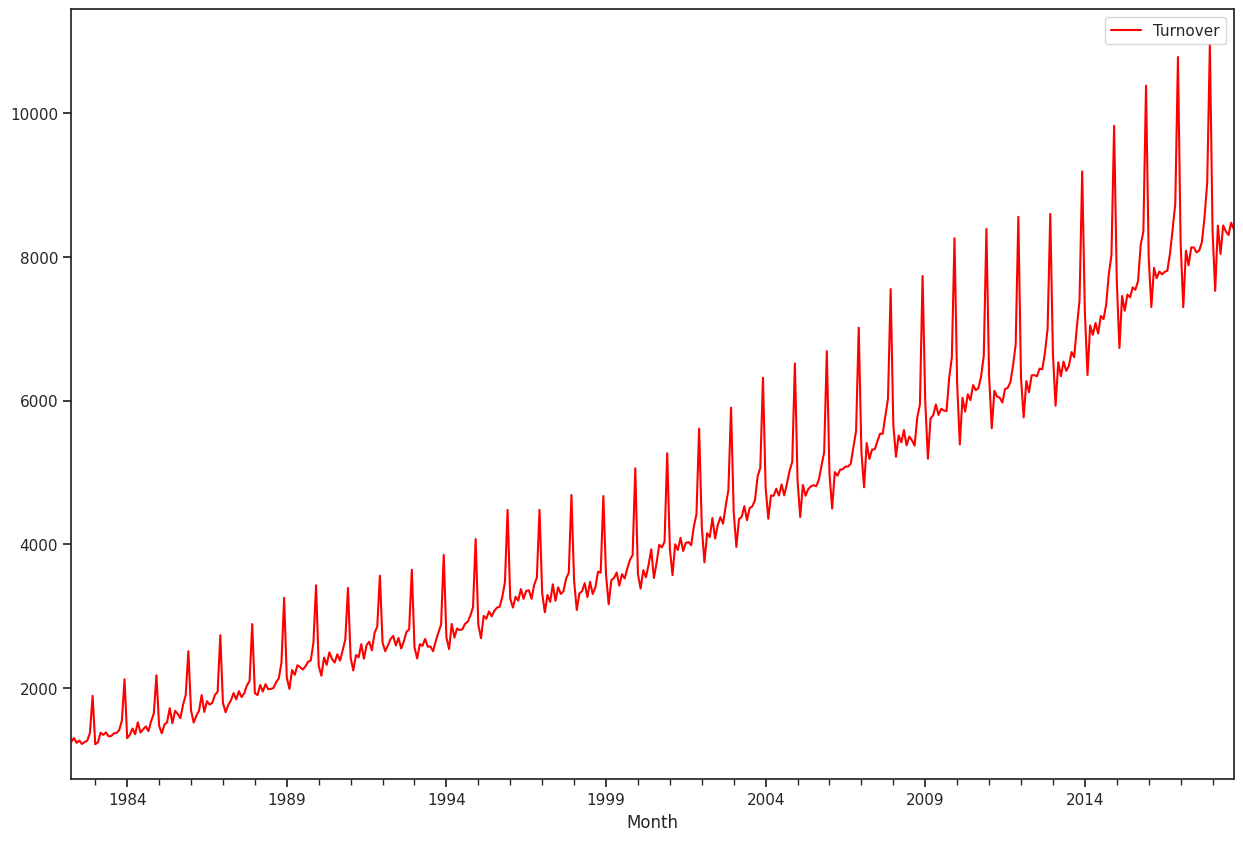

In [171]:
ts.plot(color='red');

Podemos visualizar los períodos de forma individual.

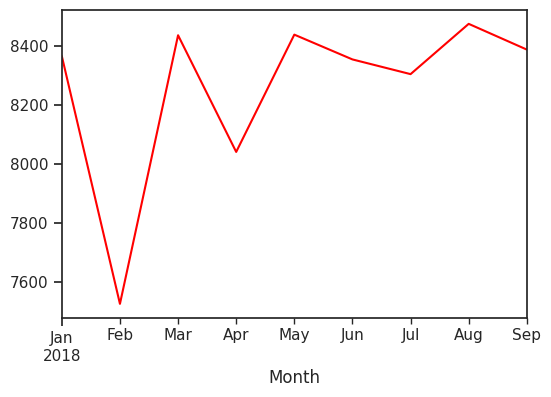

In [172]:
ts.loc['2018','Turnover'].plot(color='red',figsize=(6,4)); # Use partial string indexing for the year

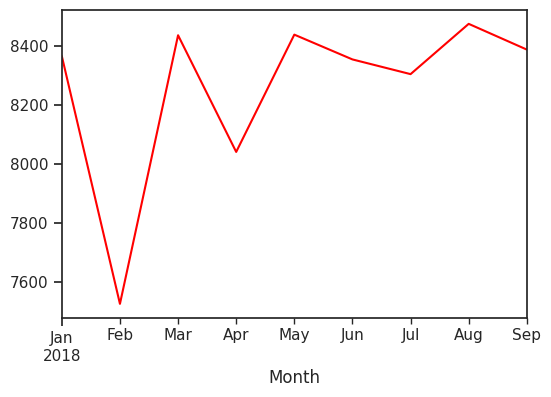

In [173]:
ts.loc['2018','Turnover'].plot(color='red',figsize=(6,4));

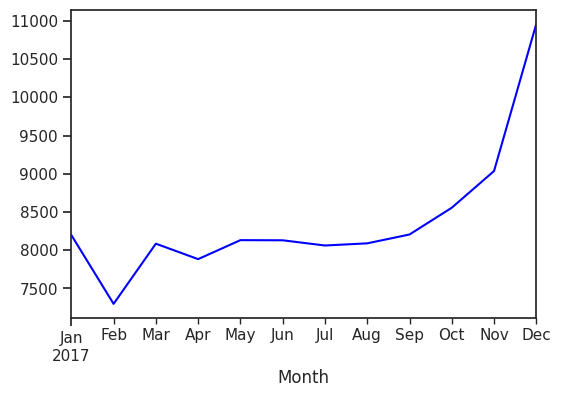

In [174]:
ts.loc['2017','Turnover'].plot(color='blue',figsize=(6,4));

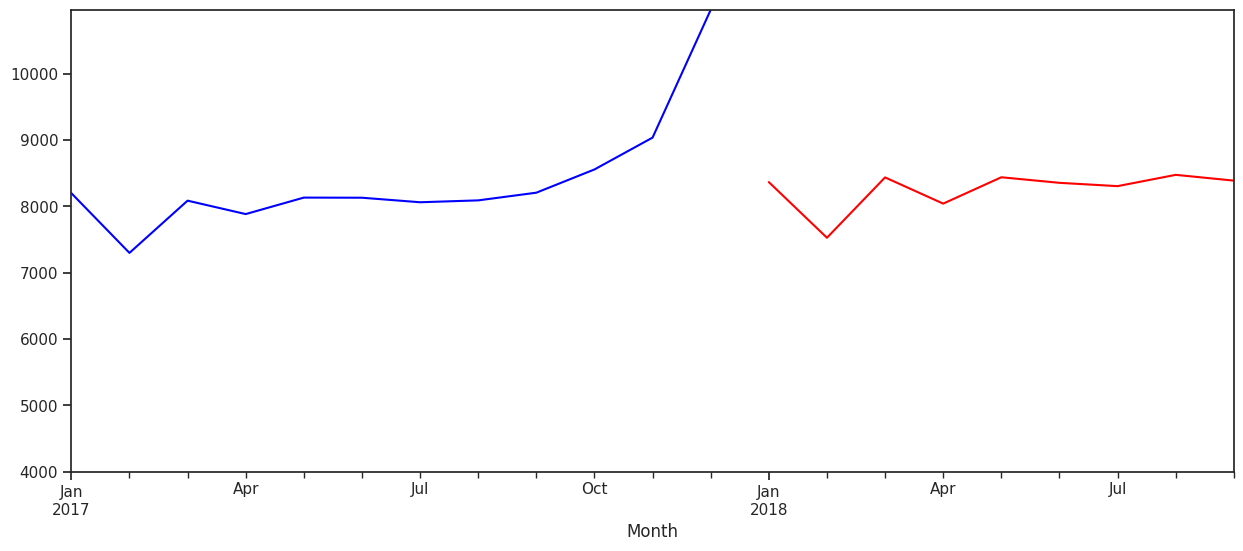

In [175]:
plt.rcParams['figure.figsize'] = [15,6]
ts.loc['2018','Turnover'].plot(color='red',ylim=(4000,ts['Turnover'].max()));
plt.rcParams['figure.figsize'] = [15,6]
ts.loc['2017','Turnover'].plot(color='blue',ylim=(4000,ts['Turnover'].max()));

Entonces, para comparar períodos mediante gráficos, usamos el gráfico de líneas de Seaborn utilizando el parámetro hue.

In [176]:
ts['month'] = ts.index.month
ts['year'] = ts.index.year

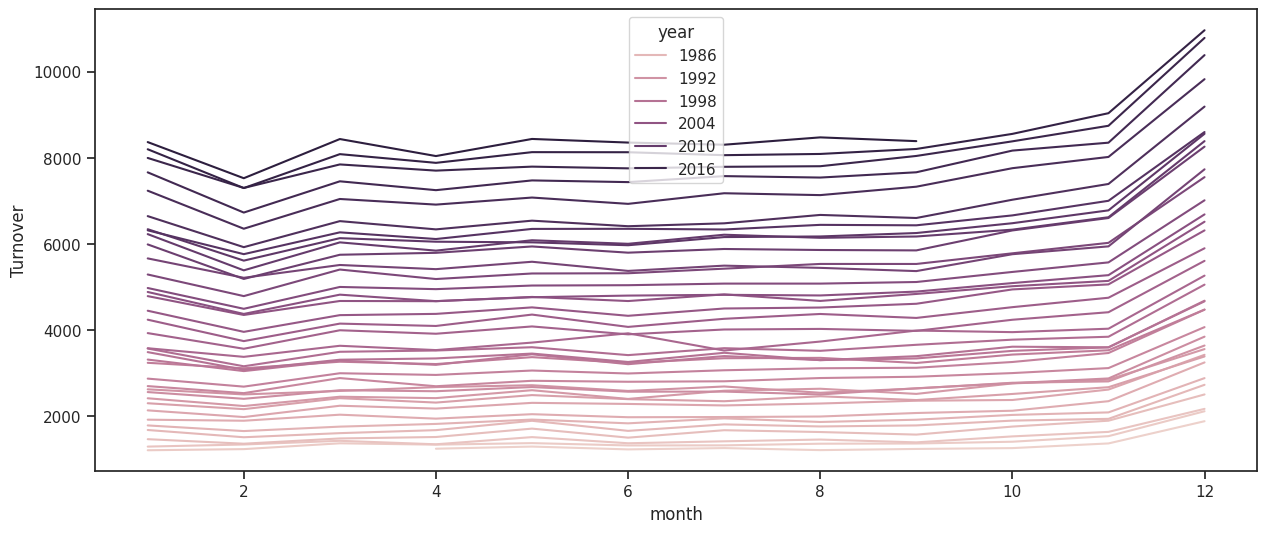

In [177]:
sns.lineplot(x='month',y='Turnover',hue='year',data=ts, markers='None');

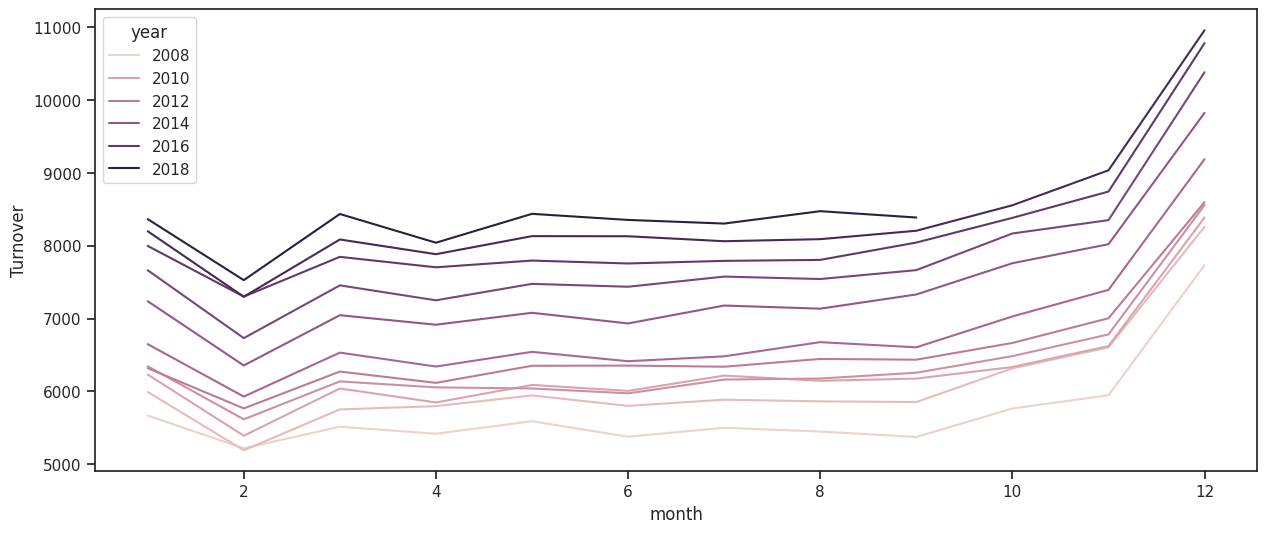

In [178]:
sns.lineplot(x='month',y='Turnover',hue='year',data=ts['2008':'2018'], markers='None');

También podemos resumir los datos por año en una sola línea y su intervalo.

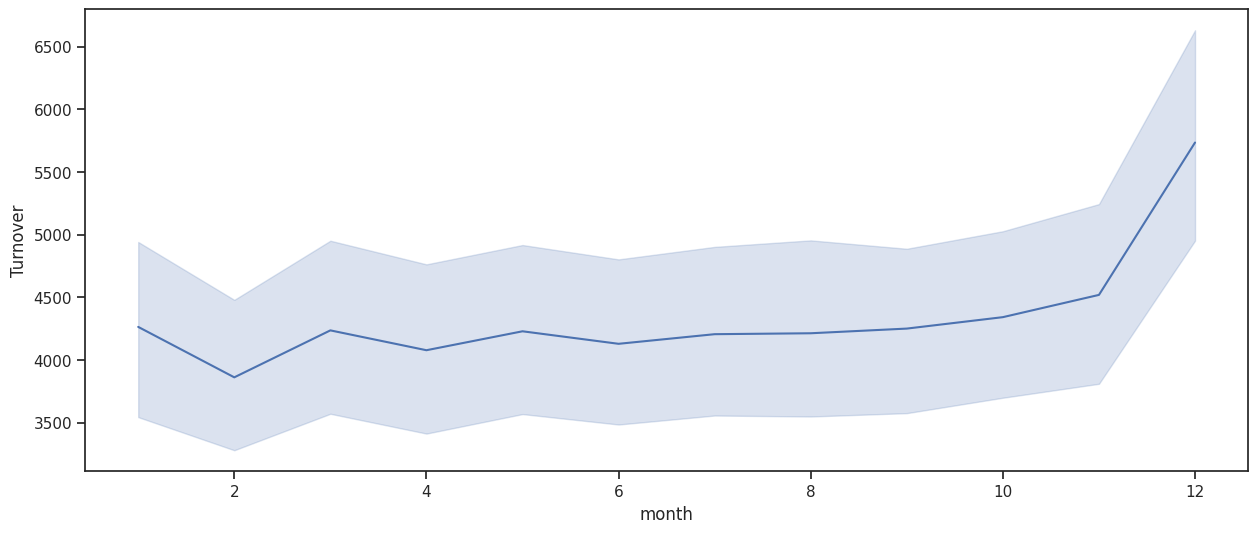

In [179]:
sns.lineplot(x='month',y='Turnover',data=ts[['month','Turnover']]);

El diagrama de caja podría condensar esta información.

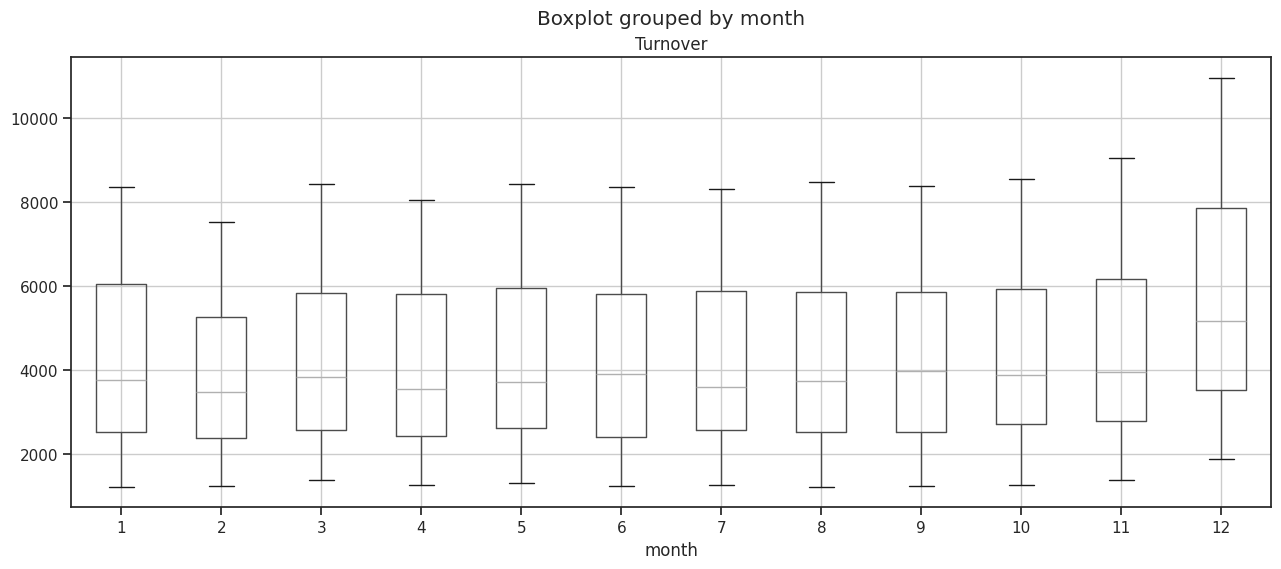

In [180]:
ts.boxplot(column='Turnover',by='month');

Podemos ver mucha dispersión por mes, pero parece que cada diciembre presenta un salto.

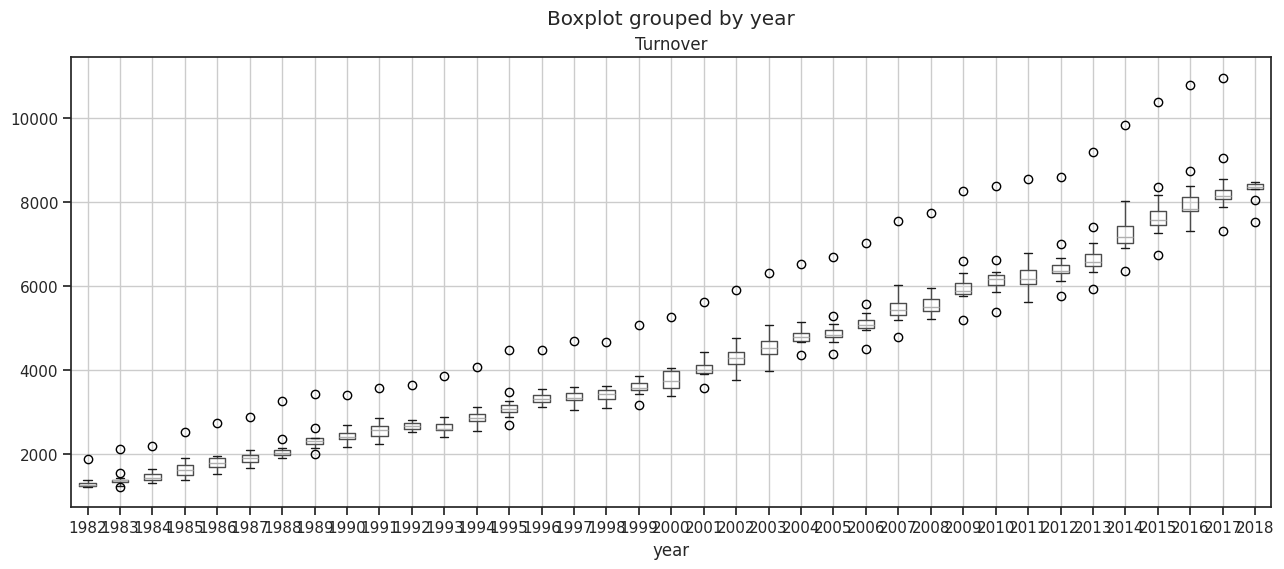

In [181]:
ts.boxplot(column='Turnover',by='year');

Agrupando por año, podemos ver la tendencia.

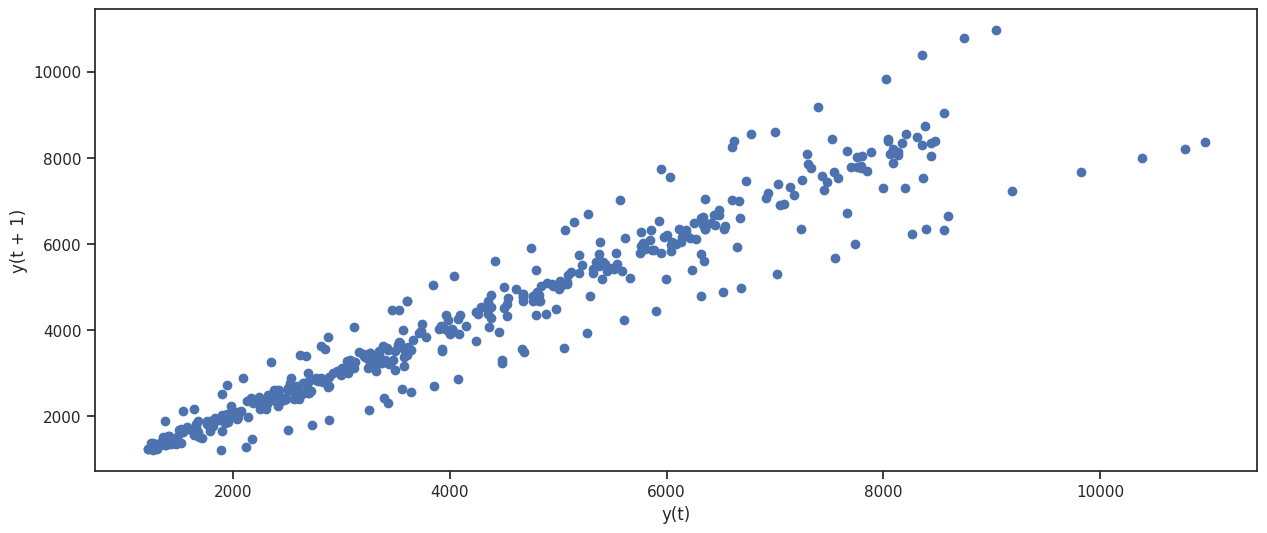

In [182]:
from pandas.plotting import lag_plot

lag_plot(ts['Turnover']);

Por defecto, el retraso es 1, por lo que, incluso cuando no vemos una correlación completa, observamos que regularmente algunos meses suben y otros bajan.

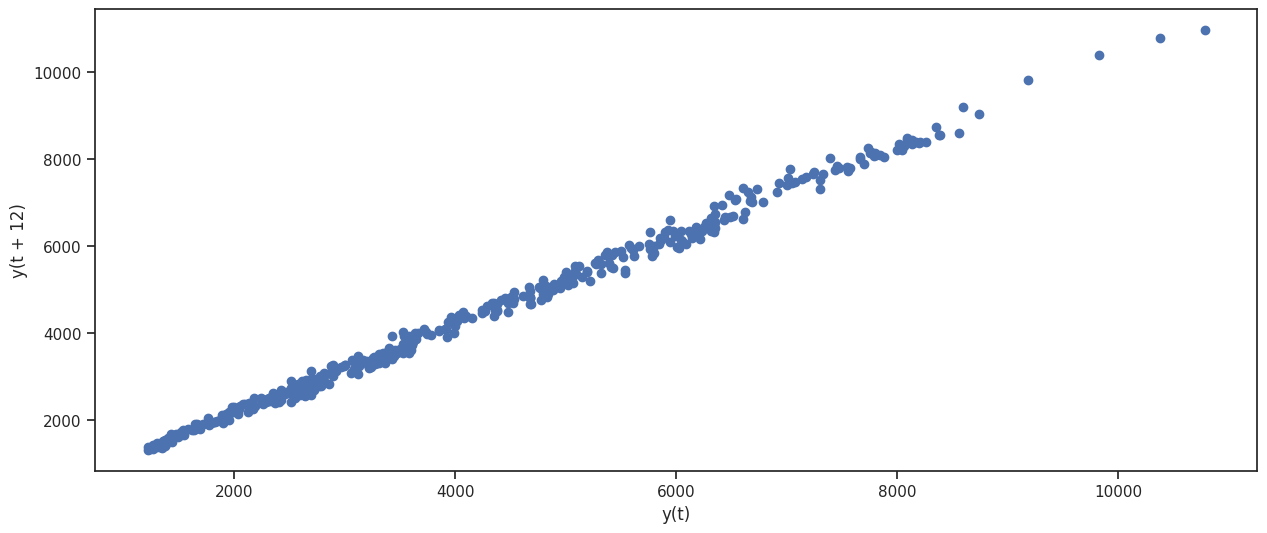

In [183]:
lag_plot(ts['Turnover'],lag=12);

Al hacer un gráfico de retraso con lag=12, podemos ver que hay una clara estacionalidad anual.

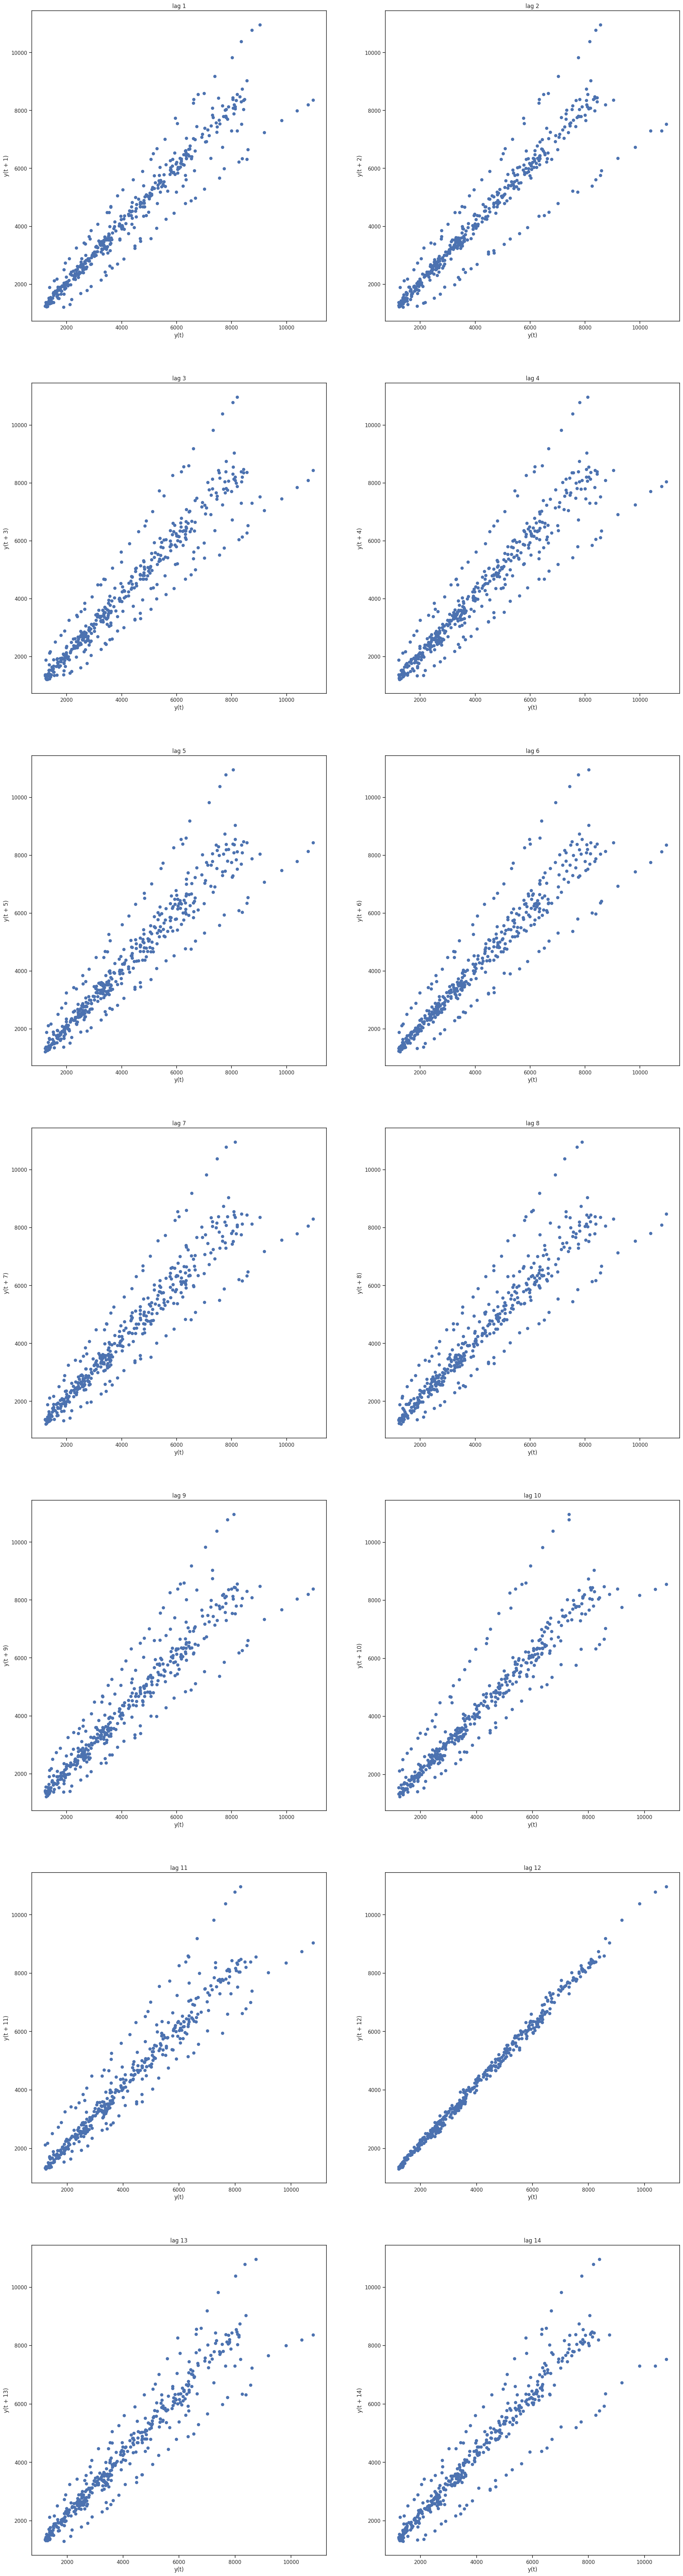

In [184]:
plt.rcParams['figure.figsize'] = [25, 200]
for i in range(14):
   plt.subplot(14,2,i+1)
   plt.title("lag " + str(i+1))
   lag_plot(ts['Turnover'],lag=i+1);

## 1. Análisis Exploratorio de Datos

Ahora sí, arranquemos con Series de Tiempo. Vamos a trabajar con un dataset de temperaturas históricas en la ciudad de Buenos Aires.

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [186]:
data = pd.read_csv('Temperatura.csv')
data.head()

,dia,mes,anio,Tmax,Tmin
0,1,1,1959,25.6,11.6
1,2,1,1959,26.2,16.4
2,3,1,1959,27.3,18.8
3,4,1,1959,25.4,16.6
4,5,1,1959,21.6,10.7


Si bien está la información de las fechas en ese dataset, no está en un formata fecha como `datetime`. Pandas incorpora varias funcionalidades para trabajar con fechas y horarios, que puedes investigar [aquí](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html) (tenlo a mano pero no hace falta que lo leas ahora).

Usaremos la función `to_datetime` para agregar una columna con las fechas.

In [187]:
data['fecha'] = pd.to_datetime({'year':data.anio, 'month': data.mes, 'day': data.dia})
data.head()

,dia,mes,anio,Tmax,Tmin,fecha
0,1,1,1959,25.6,11.6,1959-01-01
1,2,1,1959,26.2,16.4,1959-01-02
2,3,1,1959,27.3,18.8,1959-01-03
3,4,1,1959,25.4,16.6,1959-01-04
4,5,1,1959,21.6,10.7,1959-01-05


Grafiquemos las series:

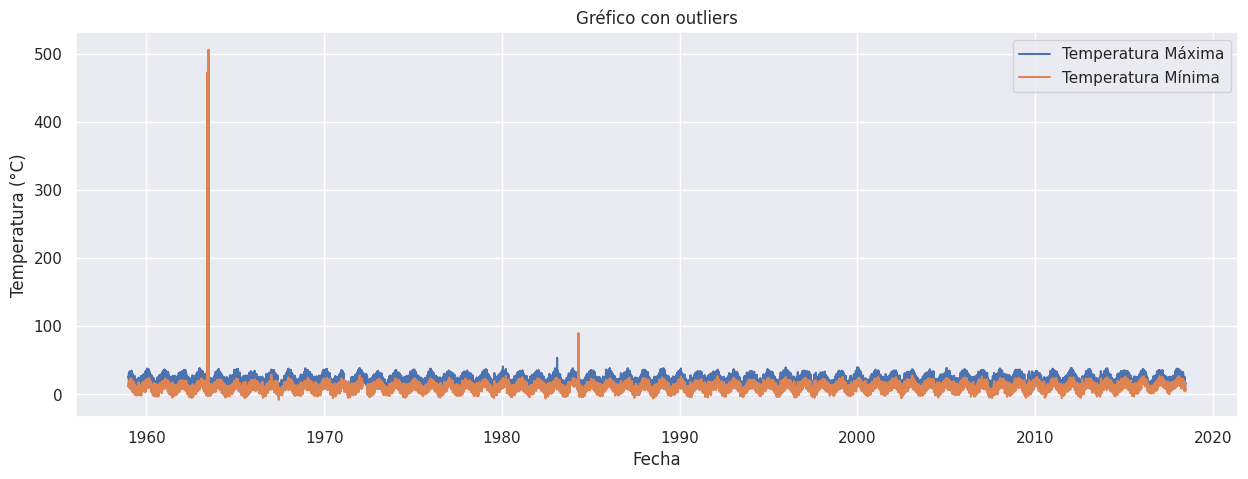

In [188]:
plt.figure(figsize = (15,5))
plt.plot(data.fecha, data.Tmax, label = 'Temperatura Máxima')
plt.plot(data.fecha, data.Tmin, label = 'Temperatura Mínima')
plt.legend()
plt.title("Gréfico con outliers")
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
#plt.ylim(-10,40)
plt.show()

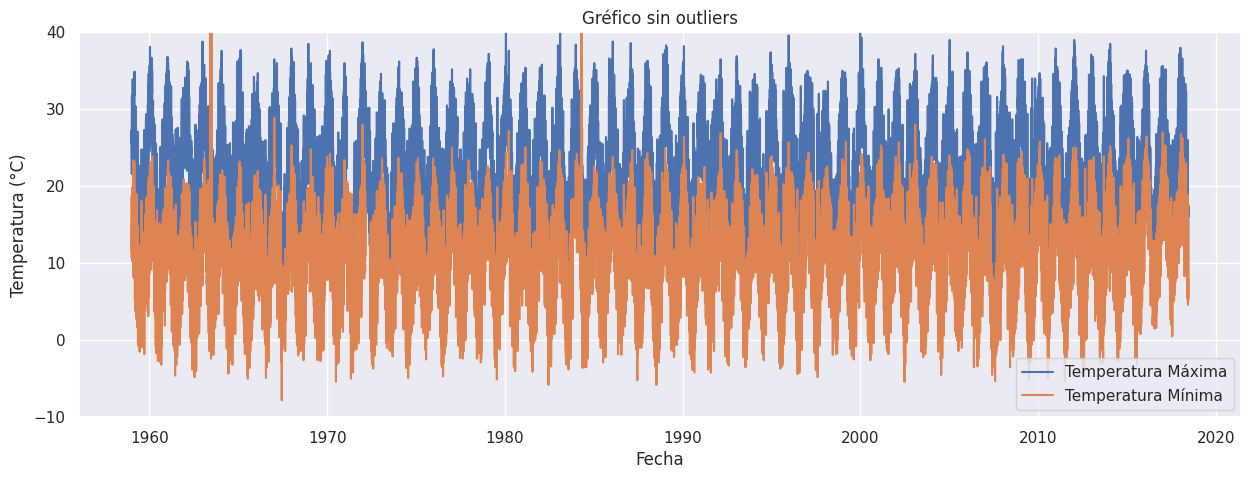

In [189]:
plt.figure(figsize = (15,5))
plt.plot(data.fecha, data.Tmax, label = 'Temperatura Máxima')
plt.plot(data.fecha, data.Tmin, label = 'Temperatura Mínima')
plt.legend()
plt.title("Gréfico sin outliers")
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.ylim(-10,40)
plt.show()

¿Te parece que hay valores atípicos? Modifica el gráfico para que los valores atípicos no impidan su visualización. ¿Hay estacionalidad?

Las series de tiempo de temperatura se ven "ruidosas" o saturadas. Notar que tenemos temperaturas diarias (frecuencia diaria) para una ventana de tiempo de aproximadamente 50 años. Esto hace que el gráfico se sature. Una opción cómoda en estos casos es resamplear la serie a una frecuencia menor, por ejemplo semanal, para suavizar el gráfico.

In [190]:
semanal = data.resample('W', on = 'fecha').mean()
semanal.head()

,dia,mes,anio,Tmax,Tmin
fecha,,,,,
1959-01-04,2.500000,1.000000,1959.0,26.125000,15.850000
1959-01-11,8.000000,1.000000,1959.0,26.600000,12.785714
1959-01-18,15.000000,1.000000,1959.0,28.300000,16.885714
1959-01-25,22.000000,1.000000,1959.0,31.300000,16.400000
1959-02-01,24.571429,1.142857,1959.0,27.633333,16.014286


La información que hay ahora en las columnas `día`, `mes` y `anio` no tiene mucho sentido, así que las tiramos.

In [191]:
semanal.drop(columns = ['dia', 'mes', 'anio'], inplace = True)
semanal.head()

,Tmax,Tmin
fecha,,
1959-01-04,26.125000,15.850000
1959-01-11,26.600000,12.785714
1959-01-18,28.300000,16.885714
1959-01-25,31.300000,16.400000
1959-02-01,27.633333,16.014286


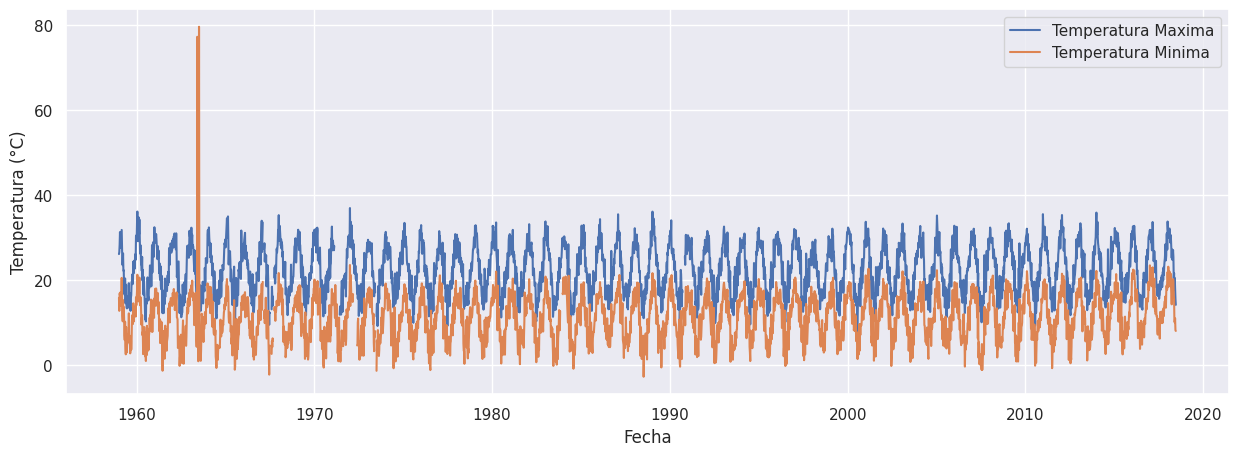

In [192]:
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.Tmax, label = 'Temperatura Maxima')
plt.plot(semanal.index, semanal.Tmin, label = 'Temperatura Minima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
#plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
#plt.ylim(-10,40)
plt.legend()
plt.show()

**Para pensar y probar**:
1. ¿Qué pasó con los valores atípicos?¿Cómo los sacarías?
Dos de los tres valores outliers, al tomar el promedio semanal, se "anulo la condición de outlier" o se promedio el valor y se obtuvo un resultado esperable.

Sin embargo se nota un valor que se mantiene sin importar esta tranformación. Una posible metodología es eliminar estas observaciones y de tratar completar este lugart con:
* Backward Fill
* Linear Interpolation
* Quadratic interpolation
* Mean of nearest neighbors
* Mean of seasonal couterparts

1. ¿Puedes ver estacionalidad y tendencia?

Puedo ver estacionalidad y tendencia es nula. Si tomamos como ventana temporal desde 2012 en adelante, se puede observar un leve tendencia positiva.

1. ¿Hay valores faltantes? Ten en cuenta que pueden haber dos tipos de valores faltantes. Uno corresponde a una fecha sin su valor de temperatura (es decir, está la fecha, no la temperatura). El otro corresponde a una fecha que no está (no está la fecha ni la temperatura). En ese caso, **no aparecerá con `isna()`.** ¿Cómo los encontrarías? [Pista](https://stackoverflow.com/questions/56040743/check-if-list-of-dates-is-complete-in-python-using-pandas). ¿Cómo los imputarías (cualquiera de los dos casos)?






In [193]:
data['date_check'] = data.fecha.diff()
data.date_check.value_counts()

,count
date_check,
1 days,21710
2 days,2
-1 days,1


In [194]:
# COMPLETAR
data.isna().sum()

,0
dia,0
mes,0
anio,0
Tmax,381
Tmin,278
fecha,0
date_check,1


In [195]:
data.loc[0,"date_check"] = data.loc[1,"date_check"]

In [196]:
# COMPLETAR
data.head()

,dia,mes,anio,Tmax,Tmin,fecha,date_check
0,1,1,1959,25.6,11.6,1959-01-01,1 days
1,2,1,1959,26.2,16.4,1959-01-02,1 days
2,3,1,1959,27.3,18.8,1959-01-03,1 days
3,4,1,1959,25.4,16.6,1959-01-04,1 days
4,5,1,1959,21.6,10.7,1959-01-05,1 days


In [197]:
data.loc[data.date_check=="2 days",:]

,dia,mes,anio,Tmax,Tmin,fecha,date_check
231,21,8,1959,NaN,NaN,1959-08-21,2 days
233,22,8,1959,14.0,6.7,1959-08-22,2 days


In [198]:
data.loc[228:236,:]

,dia,mes,anio,Tmax,Tmin,fecha,date_check
228,17,8,1959,11.2,-0.3,1959-08-17,1 days
229,18,8,1959,12.2,-0.9,1959-08-18,1 days
230,19,8,1959,13.2,4.8,1959-08-19,1 days
231,21,8,1959,NaN,NaN,1959-08-21,2 days
232,20,8,1959,15.0,NaN,1959-08-20,-1 days
233,22,8,1959,14.0,6.7,1959-08-22,2 days
234,23,8,1959,17.0,3.7,1959-08-23,1 days
235,24,8,1959,19.5,5.1,1959-08-24,1 days
236,25,8,1959,14.0,5.4,1959-08-25,1 days


In [199]:
data.loc[231,"dia"] = 20
data.loc[232,"dia"] = 21
data['fecha'] = pd.to_datetime({'year':data.anio, 'month': data.mes, 'day': data.dia})
data['date_check'] = data.fecha.diff()
data.loc[229:234,:]

,dia,mes,anio,Tmax,Tmin,fecha,date_check
229,18,8,1959,12.2,-0.9,1959-08-18,1 days
230,19,8,1959,13.2,4.8,1959-08-19,1 days
231,20,8,1959,NaN,NaN,1959-08-20,1 days
232,21,8,1959,15.0,NaN,1959-08-21,1 days
233,22,8,1959,14.0,6.7,1959-08-22,1 days
234,23,8,1959,17.0,3.7,1959-08-23,1 days


In [200]:
data['date_check'].value_counts()

,count
date_check,
1 days,21713


In [201]:
semanal = data.resample('W', on = 'fecha').mean()
semanal.drop(columns = ['dia', 'mes', 'anio'], inplace = True)

In [202]:
semanal.isna().sum()

,0
Tmax,39
Tmin,30
date_check,0


## 2. Componentes de la Serie

Obtener componentes de una Serie de Tiempo es un tema amplio y, como siempre, depende del problema en el que estás trabajando. Algunas series se comportan como $Tendencia + Estacionalidad + Ruido$, mientras que otras tienen comportamientos más complejos, como $Tendencia * Estacionalidad + Ruido$. Existen muchas formas de obtener las componentes, pero no todas funcionarán en todos los casos. Además, cada técnica tiene sus ventajas y desventajas. Vamos a hacer una enumeración y demostración no exhaustiva de algunos métodos, simplemente para que te lleves una idea de qué cosas se pueden hacer fácilmente.

* El método más sencillo se conoce como *media móvil*. Consiste en tomar una ventana de tiempo suficientemente grande y promediar la serie sobre esa ventana. De esta forma, obtienes la tendencia. Tomate un tiempo para pensar qué significa *suficientemente grande*. Una característica de este método es que no asume ninguna forma para la serie de tiempo - a diferencia del que te contaremos a continuación - así que suele funcionar en muchos casos.

* Supongamos que tienes motivos para creer que la tendencia sigue un comportamiento lineal. Entonces, basta con ajustar una regresión lineal a la serie (antes también la puedes haber promediado con el método anterior) para obtener la tendencia. Este método también sirve si tienes motivos para creer que la tendencia sigue una forma arbitraria pero conocida (por ejemplo, cuadrática, exponencial, tipo seno o coseno, etc.).

Una vez que obtienes la tendencia, en ambos casos puedes tomar la serie original, restar la tendencia y obtener una nueva serie sin tendencia, donde esperamos que sea la componente estacional la que domine.

Luego, para obtener componentes estacionales, se suele asumir una forma armónica (tipo seno o coseno). Es decir, se puede hacer un procedimiento similar al que hiciste con la tendencia (ajustar y restar a la serie sin tendencia) para obtener ruido + componentes restantes.

Veamos un poco como se traduce esto en el código.

**Media movil**

El proceso de tomar una ventana, trasladarlo a lo largo de una serie de tiempo y hacer alguna operación en esa ventana se conoce como *rolling window*. En general, se utiliza junto con la media, pero también se podría obtener el máximo, mínimo o cualquier otro estadístico.

Vamos a operar sobre la serie semanal promedio. Comenzamos sacando outliers y rellenando valores faltantes. ¿Qué hace la función `interpolate`?

Interpolate() function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value.

Sin method agregado, nos queda una interpolación lineal

In [203]:
semanal.Tmax[semanal.Tmax > 50] = np.nan
semanal.Tmin[semanal.Tmin > 50] = np.nan

<ipython-input-203-c1216d212587>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  semanal.Tmax[semanal.Tmax > 50] = np.nan
<ipython-input-203-c1216d212587>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [204]:
print(semanal.isna().sum())
semanal = semanal.interpolate()
print(semanal.isna().sum())

Tmax          39
Tmin          32
date_check     0
dtype: int64
Tmax          0
Tmin          0
date_check    0
dtype: int64


In [205]:
semanal['Tmean'] = (semanal.Tmax + semanal.Tmin)/2
semanal

,Tmax,Tmin,date_check,Tmean
fecha,,,,
1959-01-04,26.125000,15.850000,1 days,20.987500
1959-01-11,26.600000,12.785714,1 days,19.692857
1959-01-18,28.300000,16.885714,1 days,22.592857
1959-01-25,31.300000,16.400000,1 days,23.850000
1959-02-01,27.633333,16.014286,1 days,21.823810
...,...,...,...,...
2018-05-20,17.857143,10.242857,1 days,14.050000
2018-05-27,20.500000,10.085714,1 days,15.292857
2018-06-03,18.071429,11.014286,1 days,14.542857


In [206]:
ventana = int(365*2/7)
semanal_promedio_tendencia = semanal.Tmean.rolling(window=ventana, center = True).mean()
semanal_promedio_tendencia

,Tmean
fecha,
1959-01-04,NaN
1959-01-11,NaN
1959-01-18,NaN
1959-01-25,NaN
1959-02-01,NaN
...,...
2018-05-20,NaN
2018-05-27,NaN
2018-06-03,NaN


Pandas **dataframe.rolling()** function provides the feature of rolling window calculations. In a very simple words we take a window size of k at a time and perform some desired mathematical operation on it. A window of size k means k consecutive values at a time. In a very simple case all the ‘k’ values are equally weighted.

¿Por qué aparecen tanto valores faltantes?¿Cuántos son?¿A qué corresponde?

In [207]:
semanal_promedio_tendencia.isna().sum()

np.int64(103)

In [208]:
365*2/7

104.28571428571429

Son 103 valores faltantes correspondientes a los límites inferior y superior de datos que no llegan a tener 104 valores

Grafiquemos

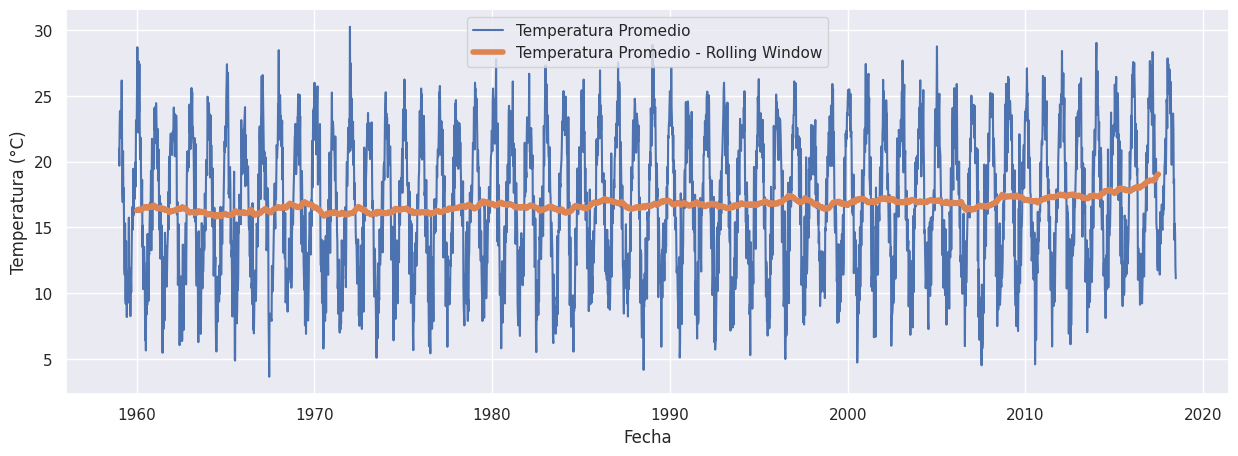

In [209]:
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.Tmean, label = 'Temperatura Promedio')
plt.plot(semanal_promedio_tendencia, lw = 4, label = 'Temperatura Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

**Tendencia Lineal**

Este método consiste simplemente en ajustar una regresión lineal a la serie. Ten en cuenta que la validez de este método es muy limitada.

Para comenzar, lo único que tenemos que tener en cuenta es que no podemos ajustar una regresión lineal con las fechas así como las tenemos, por lo que tenemos que pasarlas a un formato numérico.

In [211]:
semanal['fecha_numeros']=semanal.index.map(datetime.toordinal)
semanal.head()

,Tmax,Tmin,date_check,Tmean,fecha_numeros
fecha,,,,,
1959-01-04,26.125000,15.850000,1 days,20.987500,715148
1959-01-11,26.600000,12.785714,1 days,19.692857,715155
1959-01-18,28.300000,16.885714,1 days,22.592857,715162
1959-01-25,31.300000,16.400000,1 days,23.850000,715169
1959-02-01,27.633333,16.014286,1 days,21.823810,715176


In [212]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(semanal.fecha_numeros.values.reshape(-1, 1), semanal.Tmean)

LinearRegression()

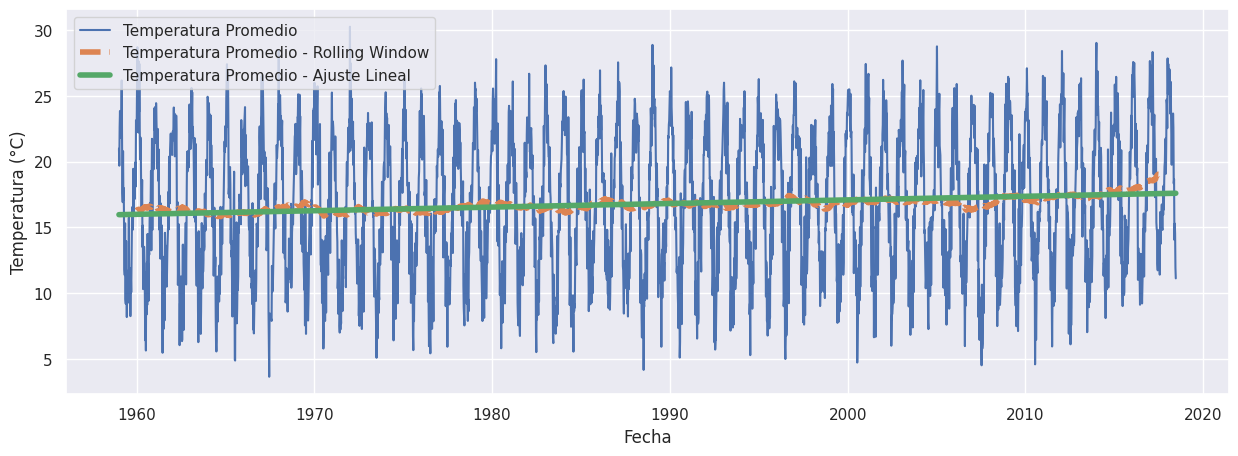

In [213]:
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.Tmean, label = 'Temperatura Promedio')
plt.plot(semanal_promedio_tendencia, ls = '--', lw = 4, label = 'Temperatura Promedio - Rolling Window')
plt.plot(semanal.index, lr.predict(semanal.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Temperatura Promedio - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

¿Qué conclusiones sacarías de ese gráfico?

Que solo la tendencia lineal no es suficiente para estimar la temperatura promedio.

Falta obtener las restantes componentes.

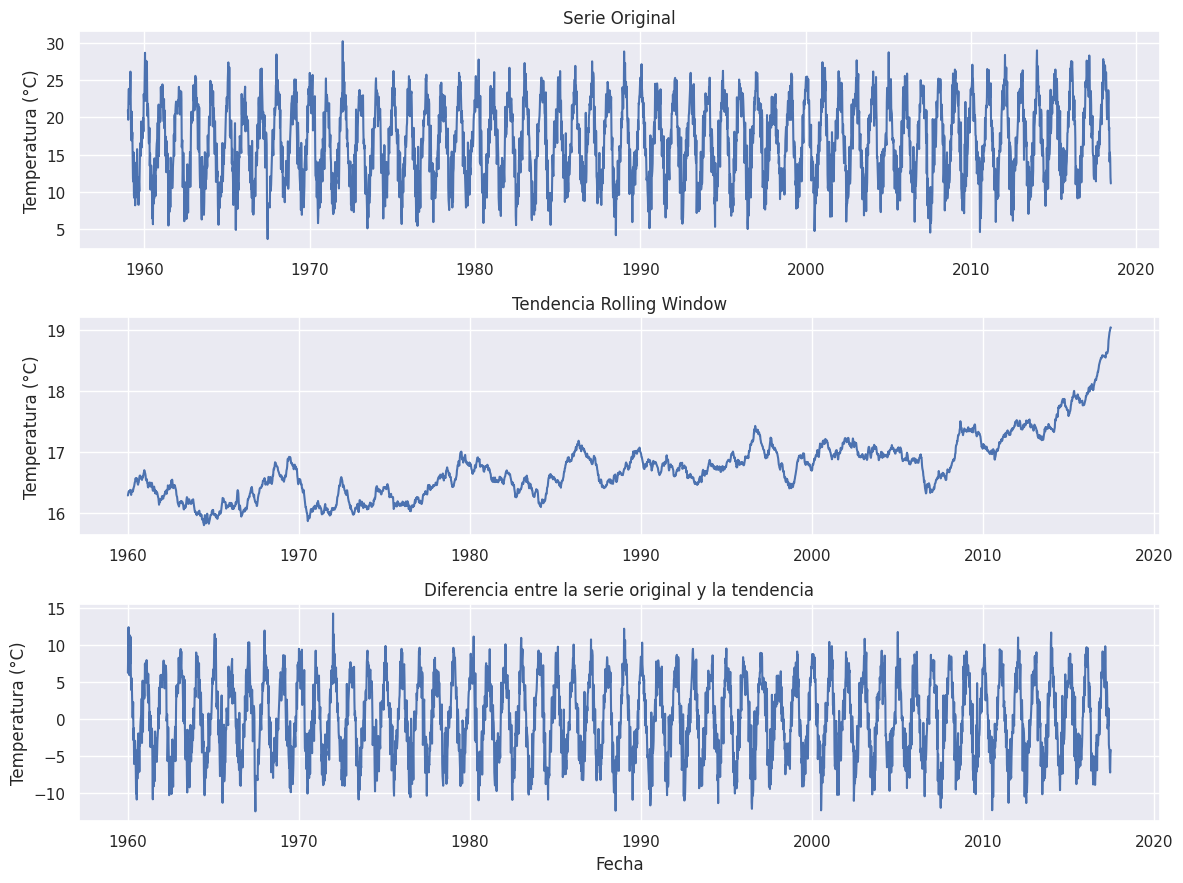

In [214]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(semanal.index, semanal.Tmean)
plt.ylabel('Temperatura (°C)')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(semanal_promedio_tendencia)
plt.ylabel('Temperatura (°C)')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(semanal.index, semanal.Tmean - semanal_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')

plt.tight_layout()
plt.show()


Una forma común de interpretar las componentes es parándose en la tendencia y diferenciar el aporte de cada estación. Por ejemplo, podríamos decir que la temperatura promedio de Buenos Aires es de alrededor de 17 grados centígrados, con una componente estacional del orden de -7 grados en invierno y del orden de +7 grados en verano.

Para finalizar, existen varias librerías que ya incorporan técnicas para descomponer series. Una muy conocida es [Statsmodels](https://www.statsmodels.org/stable/index.html), que cuenta con muchas herramientas para análisis estadísticos. Otra, exclusiva de Series de Tiempo y más nueva, es [Prophet](https://facebook.github.io/prophet/), desarrollada por Facebook. En este notebook, mostraremos brevemente el uso de Statsmodels, en el siguiente el de Prophet. Como siempre, es fundamental tener la documentación a mano.

In [215]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(semanal.Tmean, model='additive')
#import matplotlib
#matplotlib.rcParams['figure.figsize'] = [12,12]

#result.plot()
#plt.show()

In [216]:
result.trend

,trend
fecha,
1959-01-04,NaN
1959-01-11,NaN
1959-01-18,NaN
1959-01-25,NaN
1959-02-01,NaN
...,...
2018-05-20,NaN
2018-05-27,NaN
2018-06-03,NaN


In [217]:
result.seasonal

,seasonal
fecha,
1959-01-04,3.103377
1959-01-11,4.262646
1959-01-18,4.686259
1959-01-25,5.139903
1959-02-01,5.722132
...,...
2018-05-20,-5.465819
2018-05-27,-5.682251
2018-06-03,-6.556559


Grafiquemos.

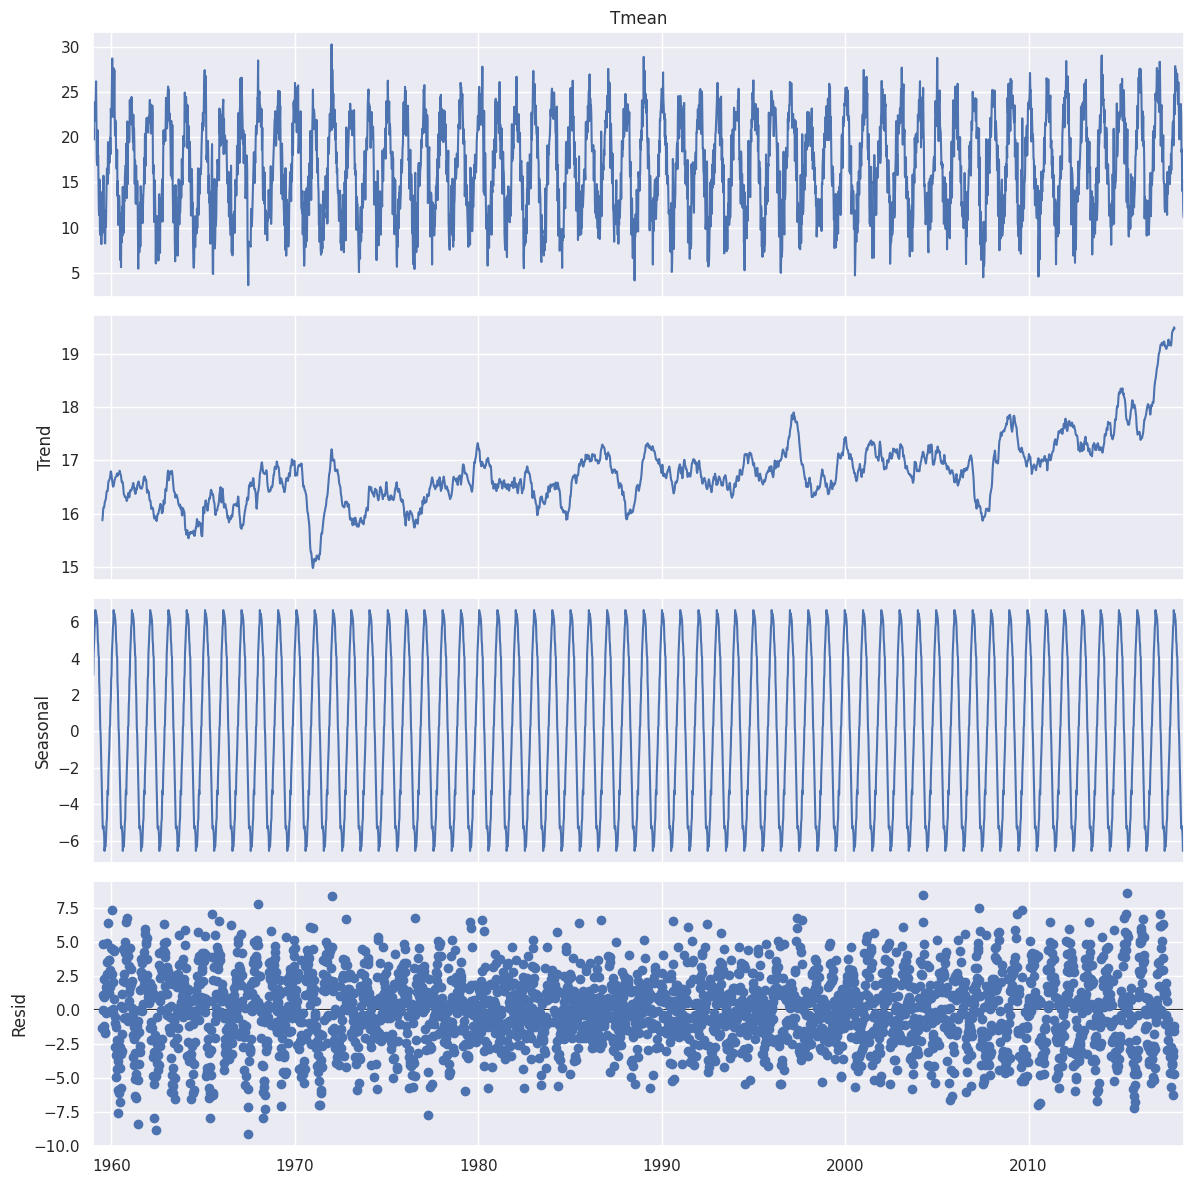

In [218]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

**Ejercicio:** Compara estos gráficos con los que obtuvimos antes y estudia cuál es la diferencia.

**Ejercicio:** Haz un histograma de los residuos (último gráfico). Recuerda lo que mencionamos en las bitácoras de regresión y decide si el modelo ajustado es apropiado.

(array([  8.,  58., 192., 451., 677., 804., 498., 273.,  79.,  11.]),
 array([-9.11491667, -7.34206972, -5.56922277, -3.79637582, -2.02352888,
        -0.25068193,  1.52216502,  3.29501197,  5.06785891,  6.84070586,
         8.61355281]),
 <BarContainer object of 10 artists>)

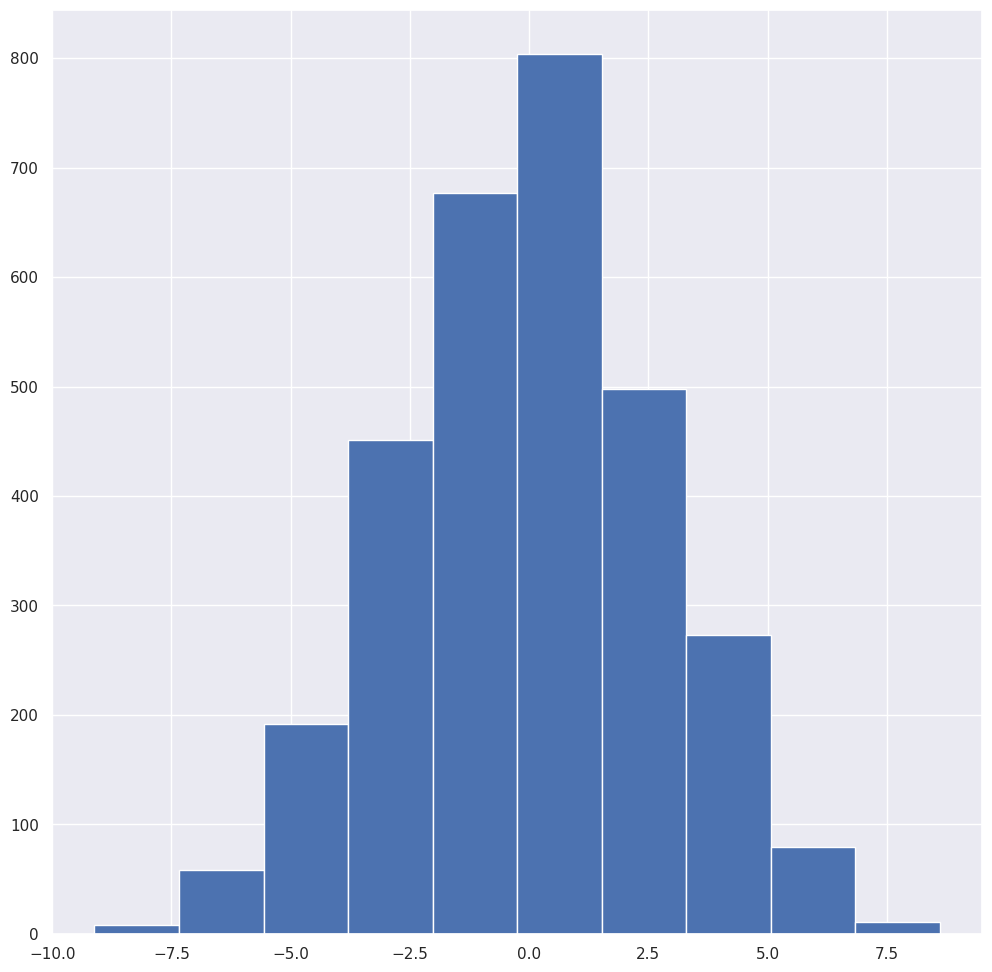

In [219]:
plt.hist(result.resid)

In [220]:
result.resid.mean()

np.float64(-0.0006429526039111511)

# Ejercicio

1. Busca un dataset de preferencia y realiza los pasos anteriores sobre el dataset